In [332]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

In [333]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(42)

In [334]:
# Number of examples, i.e., pairs of feature/label.
N = 1000

### Função objetivo

$$y = 2x_1,$$
onde $a_0=0$, $a_1 = 2$ e o vetor $x_1$ é formado por $N$ amostras linearmente espaçadas dentro do intervalo de 0 a 10.

In [335]:
# Input values (features)
x1 = np.linspace(0, 10, N).reshape(N, 1)

# True function.
y = 2.0*x1

# Noise.
w = 10.0*np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

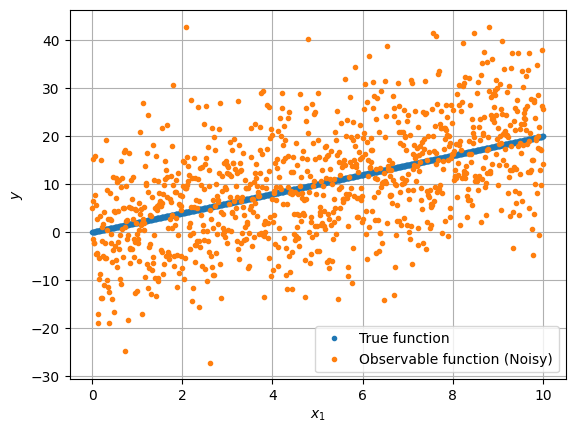

In [336]:
fig = plt.figure()
plt.plot(x1, y,'.', label='True function')
plt.plot(x1, y_noisy,'.', label='Observable function (Noisy)')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

## Função hipótese

$$\hat{y} = \hat{a}_1 x_1.$$

## Superfície de erro

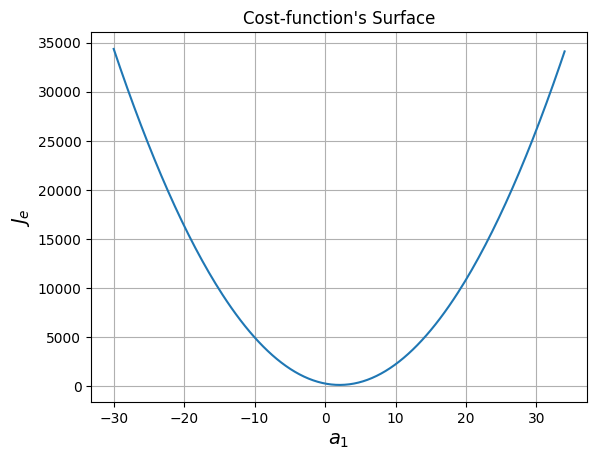

In [337]:
# Generate values for parameters.
M = 200
A1 = np.linspace(-30.0, 34.0, M)

# Generate points for plotting the cost-function surface.
J = np.zeros((M))
for iter1 in range(0, M):
    # Hypothesis function.
    yhat = A1[iter1]*x1
    J[iter1] = (1.0/N)*np.sum(np.square(y_noisy - yhat));

# Plot cost-function surface.
fig = plt.figure()
plt.plot(A1, J)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
plt.grid()
#Show the plot.
plt.show()

## Solução ótima

In [338]:
# Closed-form solution.
a1_opt = np.linalg.pinv(np.transpose(x1).dot(x1)).dot(np.transpose(x1).dot(y_noisy))

yhat = a1_opt*x1

Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

print('a1:', a1_opt)
print('MSE ótimo:', Joptimum)

a1: [[2.05907466]]
MSE ótimo: 95.71148639345347


## Solução iterativa com o gradiente descendente

In [339]:
# Gradient-descent solution.
maxNumIter = 10000

# Learning rate.
#alpha = 0.00003
alpha = 0.00001

# Create empty structures.
a1_hist = np.zeros((maxNumIter,))
Jgd = np.zeros((maxNumIter,))

# Initialize weight.
a1 = -30

# Initialize weight history.
a1_hist[0] = a1

# Initial MSE.
yhat = a1*x1
Jgd[0] = (1.0/N)*np.sum(np.power(y_noisy - yhat, 2))

# Training loop.
error = 1
iteration = 0
while(error > 0.00001 and iteration < maxNumIter-1):

    # Hypothesis function.
    h = a1*x1

    # Update weight with gradient information.
    update = -x1.T.dot(y_noisy - h)
    a1 = a1 - alpha*update

    # Update weight history.
    a1_hist[iteration+1] = a1[0,0]

    # Update MSE with new weight value.
    yhat = a1*x1
    Jgd[iteration+1] = (1.0/N)*np.sum(np.power(y_noisy - yhat, 2))

    # MSE between subsequent iterations.
    error = np.abs(Jgd[iteration] - Jgd[iteration+1])

    # Iteration counter.
    iteration += 1

## Comparando as soluções

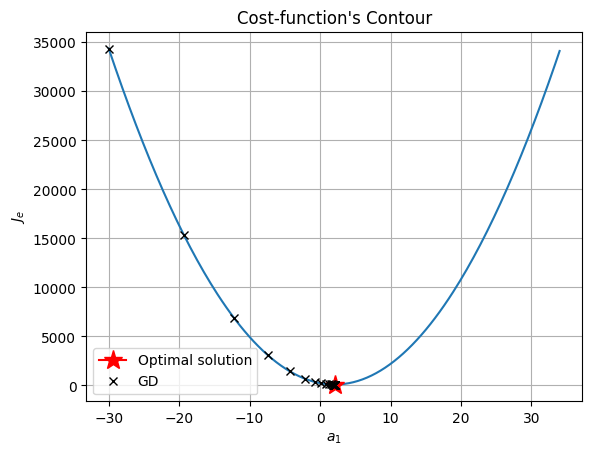

In [340]:
fig = plt.figure()
plt.plot(A1, J)
plt.xlabel('$a_1$')
plt.ylabel('$J_e$')
plt.title('Cost-function\'s Contour')
plt.plot(a1_opt[0], Joptimum, c='r', marker='*', markersize=14, label='Optimal solution')
plt.plot(a1_hist[0:iteration], Jgd[0:iteration], 'kx', label='GD')
plt.grid()
plt.legend()
plt.show()

## Erro de treinamento versus iteração

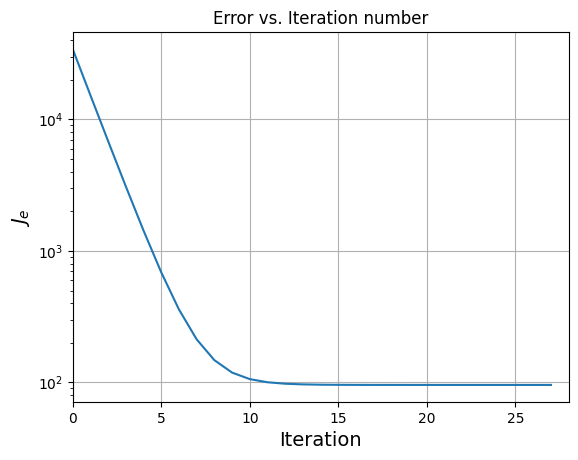

In [341]:
fig = plt.figure()
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$J_e$', fontsize=14)
plt.title('Error vs. Iteration number')
plt.grid()
plt.show()

## Comparando as soluções

In [342]:
print('a_opt: ' + str(a1_opt[0][0]))
print('a_gd: ' + str(a1[0][0]))

a_opt: 2.059074663632596
a_gd: 2.058701110619257
